NAMA : Mohammad Nurdin Prastya Hermansah

Prodi : D4 Teknik Elektronika

NIM: 20507334047

# **Machine Learning - Linear Regression**

Dalam latihan ini, kita akan mengimplementasikan regresi linier sederhana menggunakan gradient descent dan menerapkannya pada contoh masalah yaitu untuk masalah pertama memprediksi keuntungan dari penjualan food truck menggunakan Linier Regressi One Variabel dan masalah kedua adalah menggunakan Linier Regressi Multiple Variable.

# **Linear regression with one variable**

**Tahap 1**

Untuk bagian pertama dari latihan ini, tugas kita adalah mengimplementasikan regresi linier dengan satu variabel untuk memprediksi keuntungan untuk sebuah truk makanan. Misalkan Anda adalah CEO dari sebuah waralaba restoran dan sedang mempertimbangkan kota-kota yang berbeda untuk membuka outlet baru. Tujuan kita adalah untuk membuat model regresi linier yang dapat memprediksi keuntungan truk makanan berdasarkan jumlah penduduk di kota tersebut. Kita akan menggunakan gradient descent untuk mencari nilai koefisien dari model regresi linier yang sesuai.


In [94]:
# import library
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt

Upload file for "ex1data1.txt".

In [95]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [96]:
# load data
data = read_csv('/content/drive/MyDrive/KECERDASAN BUATAN/Tugas Praktek Kecerdasan Buatan_M.Nurdin Prastya.H/05_AI Machine Learning Exercise satu - Linear Regression/ex1data1.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [97]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


**Penjelasan**

Fungsi describe() berguna untuk mengelompokkan data kolom numerik pada DataFrame dan menghasilkan beberapa statistik deskriptif sederhana. Statistik yang dihasilkan meliputi jumlah, rata-rata, standar deviasi, nilai minimum, nilai maksimum, dan quartil. Fungsi ini biasanya digunakan untuk memperoleh gambaran umum tentang distribusi data pada DataFrame tersebut.

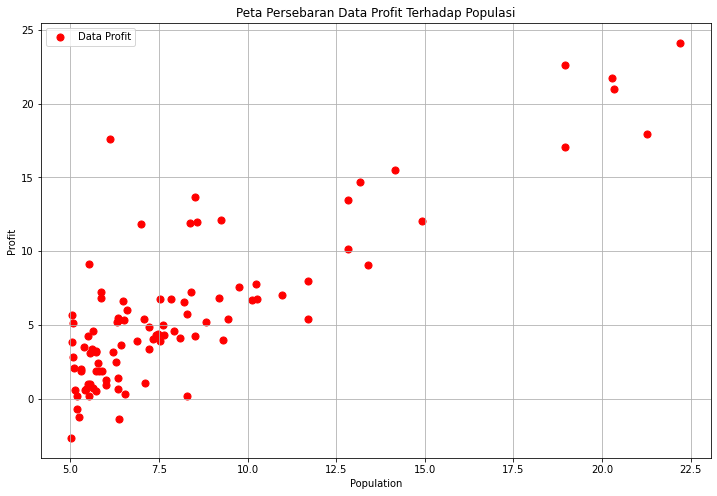

(Text(0.5, 1.0, 'Peta Persebaran Data Profit Terhadap Populasi'), None, None)

In [98]:
# melakukan ploting data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8), color='red', s=50, label='Data Profit')
plt.title('Peta Persebaran Data Profit Terhadap Populasi'), plt.grid(), plt.show()

**Tahap 2**

Sekarang mari kita implementasikan regresi linier menggunakan gradient descent untuk meminimalkan fungsi biaya. Gradient descent adalah algoritma optimisasi yang digunakan untuk menemukan nilai minimum dari fungsi tertentu. 

Pertama, kita akan membuat sebuah fungsi untuk menghitung cost dari solusi tertentu (yang di Karakterisasi oleh parameter theta).

In [99]:
# menghitung cost
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

**Penjelasan**

Fungsi computeCost() di atas adalah fungsi yang digunakan untuk menghitung nilai cost atau biaya dari model linear regression yang sedang dibangun. Fungsi ini menerima tiga input, yaitu:

X: matriks atau data frame yang berisi data input (variabel independen).

y: matriks atau data frame yang berisi data output (variabel dependen).

theta: vektor yang berisi nilai parameter dari model linear regression.

Pada fungsi tersebut, terdapat perhitungan yang menghitung nilai error atau selisih antara nilai prediksi (hasil perkalian matriks X dengan vektor theta) dengan nilai sebenarnya (y). Selisih tersebut dikuadratkan, lalu dijumlahkan untuk semua data. Hasilnya kemudian dibagi dengan 2 kali jumlah data, sehingga diperoleh nilai cost yang ternormalisasi.

Nilai cost yang dihasilkan oleh fungsi computeCost() merupakan ukuran seberapa baik model linear regression yang sedang dibangun dapat menjelaskan variasi data. Semakin kecil nilai cost, semakin baik model tersebut dapat menjelaskan variasi data. Sebaliknya, semakin besar nilai cost, semakin buruk model tersebut dapat menjelaskan variasi data.

In [100]:
# menambahkan satu kolom
data.insert(0, 'Ones', 1)

**Penjelasan**

kode diatas adalah untuk  menambahkan satu kolom ke set latihan sehingga kita dapat menggunakan solusi vektorisasi untuk menghitung biaya dan gradient.

**Tahap 3**

Spliting Data



In [101]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

**Penjelasan**

Kode di atas merupakan bagian dari program yang digunakan untuk memisahkan data input dan data output pada sebuah DataFrame. Fungsi shape pada DataFrame digunakan untuk mengetahui jumlah baris dan kolom pada DataFrame tersebut. Nilai yang dikembalikan adalah tuple yang berisi jumlah baris dan kolom, dimana shape[0] merupakan jumlah baris dan shape[1] merupakan jumlah kolom.

Kemudian, data input (X) diisikan dengan semua kolom pada DataFrame kecuali kolom terakhir, sedangkan data output (y) diisikan dengan kolom terakhir pada DataFrame. Hal ini dilakukan dengan menggunakan metode iloc pada DataFrame, yang berguna untuk melakukan indexing pada DataFrame berdasarkan posisi baris dan kolom.

In [102]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [103]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


**Tahap 4**

Fungsi biaya memerlukan matriks numpy, jadi kita perlu mengonversi X dan y menjadi matriks sebelum dapat menggunakannya. Kita juga perlu menginisialisasi theta dengan nilai awal yang sesuai.

In [104]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [105]:
# bentuk theta
theta

matrix([[0, 0]])

In [106]:
# bentuk matriks
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

**Tahap 5**

Sekarang mari kita hitung biaya untuk solusi awal kita (nilai 0 untuk theta). Untuk melakukan ini, kita dapat memanggil fungsi computeCost yang telah kita implementasikan sebelumnya seperti berikut:

In [107]:
# menghitung initial  cost 
computeCost(X, y, theta)

32.072733877455676

**Tahap 6**

Sekarang kita perlu melakukan proses pelatihan atau training pada model linear regression menggunakan algoritma gradient descent.

In [108]:
# melakukan penurunan gradien pada parameter theta 
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

**Penjelasan**

Fungsi gradientDescent() di atas adalah fungsi yang digunakan untuk melakukan proses pelatihan atau training pada model linear regression. Fungsi ini menerima lima input, yaitu:

1. X: matriks atau data frame yang berisi data input (variabel independen).
2. y: matriks atau data frame yang berisi data output (variabel dependen).
3. theta: vektor yang berisi nilai parameter dari model linear regression.
4. alpha: nilai learning rate atau seberapa besar perubahan yang dilakukan pada parameter setiap iterasi.
5. iters: jumlah iterasi yang dilakukan dalam proses pelatihan.

Fungsi tersebut menggunakan algoritma gradient descent untuk mencari nilai parameter yang optimal. Algoritma tersebut melakukan iterasi sebanyak iters kali, dengan setiap iterasi melakukan perhitungan error dan perubahan nilai parameter (theta). Setelah semua iterasi selesai, fungsi tersebut akan mengembalikan nilai theta yang teroptimalkan dan sejarah nilai cost pada setiap iterasi.

In [109]:
alpha = 0.01
iters = 1000

**penjelasan**

Kode diatas adalah proses Inisialisasi beberapa variabel tambahan - learning rate alpha, dan jumlah iterasi yang akan dilakukan.

**Tahap 7**

Sekarang mari kita jalankan algoritma gradient descent untuk menyesuaikan parameter theta dengan set latihan.

In [110]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [111]:
computeCost(X, y, g)

4.515955503078914

**Penjelasan**

Akhirnya kita dapat menghitung biaya (cost) dari model yang dilatih menggunakan parameter yang kami pasang.

**Tahap 8**

Sekarang mari kita plot model linier beserta datanya untuk melihat secara visual seberapa cocok model tersebut.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

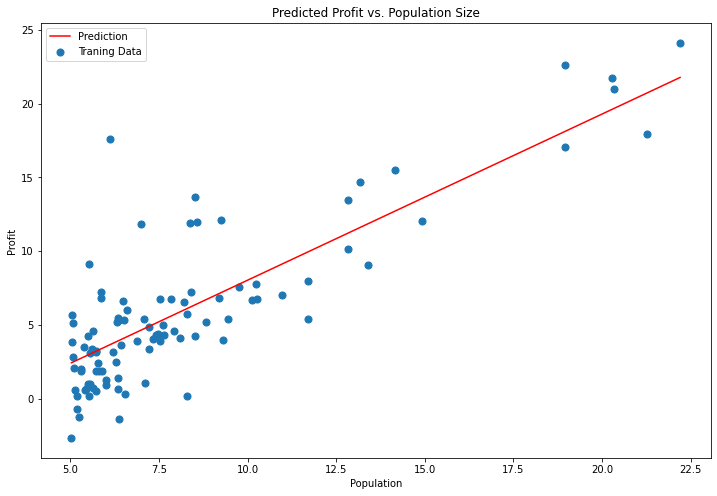

In [123]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data', s=50)
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

**Penjelasan**

Terlihat sangat baik! Karena fungsi gradient descent juga mengeluarkan vektor dengan biaya pada setiap iterasi pelatihan, kita juga dapat menampilkan grafik tersebut. Perhatikan bahwa biaya selalu menurun - ini adalah contoh dari masalah optimisasi convex.

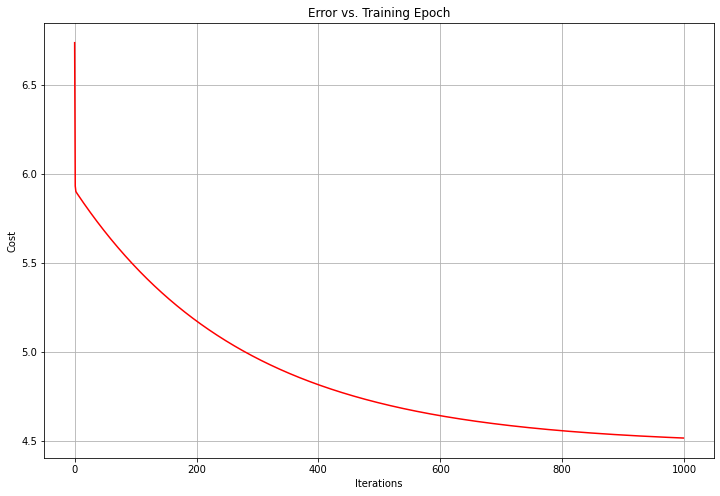

In [124]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.grid()

**Kesimpulan**

Dari hasil praktikum diatas diketahui bahwa hasil prediksi memiliki nilai keakuratan yang baik hal itu dibuktikan dengan hasil erornya yang kecil juga semakin tinggi epochnya semakin kecil erornya, Maka dari itu dimungkinkan untuk menggunakan Regresi Linier dengan algoritma gradient desenct untuk melakukan prediksi mengenai profit dari penjualan food truck.

# **Linear regression with multiple variables**

**Tahap 1**

Pada latihan 2 ini kita akan menangani masalah pada data set harga rumah dengan 2 variabel (ukuran rumah dalam kaki persegi dan jumlah kamar tidur) dan sebuah target (harga rumah).

In [115]:
# melakukan upload file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [116]:
# load data
data2 = read_csv('/content/drive/MyDrive/KECERDASAN BUATAN/Tugas Praktek Kecerdasan Buatan_M.Nurdin Prastya.H/05_AI Machine Learning Exercise satu - Linear Regression/ex1data2.txt')
data2.head()

,Size,NumberOfBedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Untuk tugas ini, kita menambahkan langkah pratahap lain - normalisasi fitur. Ini sangat mudah dengan pandas.


In [117]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,NumberOfBedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


**Penjelasan**

Fungsi (data2 - data2.mean()) / data2.std() adalah fungsi yang digunakan untuk melakukan normalisasi atau pemeringkatan data pada sebuah DataFrame. Fungsi ini akan mengurangi nilai rata-rata dari setiap elemen pada DataFrame, kemudian membagi hasilnya dengan standar deviasi dari DataFrame tersebut.

Setelah dilakukan normalisasi, maka semua elemen pada DataFrame akan memiliki nilai yang terbagi dalam rentang -1 sampai 1, dengan nilai rata-rata 0. Normalisasi data berguna untuk menghindari adanya bias pada data yang memiliki skala yang berbeda, sehingga proses training model menjadi lebih efektif.

**Tahap 2**

Sekarang mari ulangi pre-processing steps kita dari part 1 dan jalankann prosedure linier regression pada data set baru.

In [118]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.1307033696077189

Text(0.5, 1.0, 'Error vs. Training Epoch')

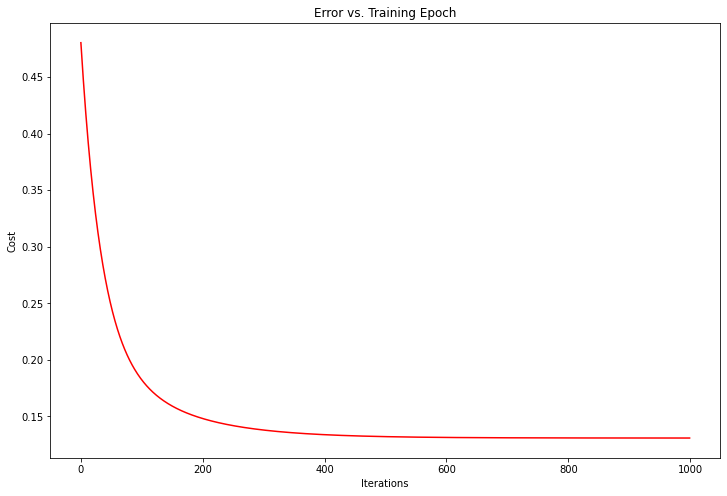

In [119]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Sebagai gantinya untuk mengimplementasikan algoritma-algoritma ini dari awal, kita juga dapat menggunakan fungsi regresi linear dari scikit-learn. Mari terapkan algoritma regresi linear dari scikit-learn pada data dari bagian 1 dan lihat apa yang dihasilkan.

In [120]:
# impport library sklearn
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearRegression()

Here's what the scikit-learn model's predictions look like. 

( Disni kita bisa melihat bagimana scikit-learn model memprediksi sebuah data)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

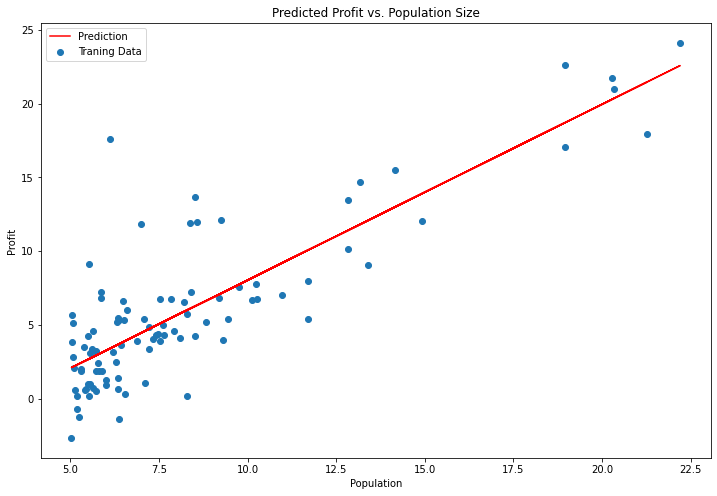

In [121]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

That's it!  Thanks for reading.  In Exercise 2 we'll take a look at logistic regression for classification problems.